In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Analytics and Statistics using Python
## S17: Statistics
- Joint, Conditional, and Marginal Probability
- Bayes' Theorem
- Random Variables
- Probability Distributions and Data
- Continuous and Discrete Distributions (Normal, Binomial, Poisson)
- Central Limit Theorem
- Sampling and Estimation
- Inferential Statistics

<img src='../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com"/>

In [2]:
###-----------------
### Import Statement
###-----------------
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

from math import sqrt
from scipy.stats import (norm, binom, poisson, 
                         shapiro, bernoulli)

In [3]:
###----------------
### Hyperparameters
###----------------
# Some Basic Parameters for housekeeping

# set location of input files:
inpDir = os.path.join('..', '..', 'input')

# set location of inputs for this module
moduleDir = 'machine_learning'

# set location of output files
outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
N_SAMPLE = 5000

# parameters for Matplotlib
params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'medium',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }

CMAP = plt.cm.rainbow
plt.rcParams.update(params)
plt.set_cmap(CMAP)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.20

<Figure size 1500x500 with 0 Axes>

### Definition of Population and Sample
- **Population:** The entire group of individuals, events, or objects that a researcher is interested in studying. It includes every possible observation that fits a given criterion. For example, the population could be all students in a university or every car manufactured by a company.

- **Sample:** A subset of the population selected for actual study. Samples are used when it's impractical or impossible to collect data from the entire population. For example, a sample could be 100 randomly chosen students from the university or 50 randomly selected cars from the company's production.

#### Practical Limitations of Studying the Population
In most cases, it is difficult or impossible to study an entire population due to:

- **Time constraints:** Collecting data from every individual in a large population can take an enormous amount of time.
- **Cost constraints:** Gathering data from every member of a population is often too expensive.
- **Inaccessibility:** It may not be feasible to reach every member of the population, particularly in large populations or when the data involves sensitive information.
### Purpose of a Sample
A sample allows researchers to make inferences about the population without having to study the entire group. The goal is to select a sample that is representative of the population so that the results can be generalized.

### Inferential Statistics
The main reason for differentiating between population and sample is that inferential statistics is based on sampling. Researchers collect data from a sample to make inferences about the broader population. Common inferential techniques include:

- **Estimation:** Using sample statistics (e.g., sample mean) to estimate population parameters (e.g., population mean).
- **Hypothesis testing:** Testing hypotheses about the population based on sample data.
For example: *A researcher may calculate the mean height of 100 randomly selected people (sample) to estimate the average height of the entire population.*

They may also use the sample to test whether the average height in a population is significantly different from a global standard.



### Population Parameters vs. Sample Statistics
- **Population Parameters:** True values that describe the characteristics of a population. These include:

- Population mean ($\mu$)
- Population variance ($\sigma^2$)
- Population proportion (P)

### Sample Statistics: 

Values calculated from the sample data used to estimate population parameters. These include:

- Sample mean ($\bar x$)
- Sample variance ($s^2$)
- Sample proportion
Since we rarely have access to the entire population, sample statistics are used to infer the corresponding population parameters.

#### Sampling Error
When using a sample, there is always a sampling error, which is the difference between the sample statistic and the actual population parameter. This error exists because a sample is only a portion of the population, so it may not perfectly represent the population.

To mitigate this, researchers use larger and more representative samples to reduce sampling error and ensure that inferences made about the population are as accurate as possible.

#### Statistical Formulas Differ for Population and Sample
The formulas used for statistical measures differ depending on whether you are calculating for a population or a sample:



- **Variance:** For a population, variance is calculated by dividing by the number of data points (N), whereas for a sample, we divide by 
n−1 (sample size minus 1). This adjustment, known as Bessel's correction, helps account for the sampling error and provides a more unbiased estimate of the population variance.

Population variance formula: 
$\sigma^2 = \frac{∑(x_i − μ)^2}{N}$


Sample variance formula:
$s^2 = \frac{∑(x_i − \bar x)^2}{n−1}$

### Generalizability of Results
The generalizability of research results depends on how well the sample represents the population:

If the sample is randomly selected and representative, the conclusions drawn from the sample can be reliably extended to the population.
If the sample is biased or non-representative, the results may not generalize well to the population, leading to inaccurate conclusions.

### Population vs. Sample in Real-World Research
Researchers rarely have access to population data, so they rely heavily on samples to conduct surveys, experiments, and observational studies. For instance:

- **Surveys:** Polls often use a sample of voters to predict election outcomes for the entire population.
- **Medical Studies:** Clinical trials use samples of patients to draw conclusions about the effectiveness of a new treatment in the broader population.
- **Market Research:** Companies use samples of consumers to assess satisfaction or predict product demand.
###  Summary
- **Population:** The entire group you want to study.
- **Sample:** A smaller, manageable subset of the population.
- **Reason for differentiation:** It is often impractical to collect data from an entire population, so a sample is used to make inferences about the population.

Inferential statistics allow researchers to make predictions or draw conclusions about the population from sample data, while recognizing the presence of sampling error.

Understanding the distinction between population and sample helps researchers and analysts design studies that are efficient and cost-effective while ensuring the results are reliable and generalizable.

In [4]:
def bootstrap(data, num_bootstrap):
    bootstrap_samples = [np.mean(np.random.choice(data, len(data), replace=True)) for _ in range(num_bootstrap)]
    ci_lower = np.percentile(bootstrap_samples, 2.5)
    ci_upper = np.percentile(bootstrap_samples, 97.5)
    return np.mean(bootstrap_samples), (ci_lower, ci_upper)

data = np.random.normal(50, 10, 1000)
mean_estimate, ci = bootstrap(data, 1000)
print(f"Mean Estimate: {mean_estimate}, Confidence Interval: {ci}")

Mean Estimate: 50.10918078897289, Confidence Interval: (49.48995605119397, 50.72818987431763)


### Probability and Distribution Functions
- **Probability:** The measure of the likelihood that an event will occur.
- **Distribution Functions:** Functions that describe the probability of different outcomes.

Introduce the concepts of probability distributions (discrete and continuous), the role of probability mass functions (PMF) for discrete distributions, and probability density functions (PDF) for continuous distributions.

#### Steps
- Simulating a random process and calculating probabilities using NumPy.
- Plotting probability distributions using matplotlib and comparing with theoretical distributions.

### Helper Functions

In [5]:
def fn_gen_data(n_sample=50,
             dist='uniform',
             random_var=0):
    """
    Generates data points for a desired distributions and return as numpy array
    """
    
    if dist=='uniform':
        d=np.random.random(size=n_sample) # Return random floats in the half-open interval [0.0, 1.0).
    
    if dist=='normal':
        d=np.random.normal(loc=1-random_var,
                           scale=1+random_var,
                           size=n_sample) # Draw random samples from a normal (Gaussian) distribution.
    
    if dist=='binomial':
        d=np.random.binomial(n=10,
                             p=0.5+random_var/10,
                             size=n_sample)
    
    if dist=='exponential':
        d=np.random.exponential(scale=0.5+random_var,
                                size=n_sample)
        
    if dist=='poisson':
        d=np.random.poisson(lam=1.0+random_var,
                            size=n_sample)

    if dist=='laplace':
        d = np.random.laplace(loc=0.0, 
                              scale=1.0, 
                              size=n_sample)
        
    # Normalize data
    d = d+np.abs(d.min())
    d = d/(d.max()-d.min())
    
    return d

In [6]:
def fn_plot_data(data, 
                 binwidth = 0.1,
                title = 'Uniform'):

    # Create the plot
    sns.histplot(data, kde=True, 
                 binwidth=binwidth, 
                 binrange=(0, 1), 
                 kde_kws={'bw_adjust': 1.5}, 
                 element='step')
    
    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'{title.title()} Distribution')
    plt.grid(True)
    
    # Show the plot
    plt.show()

### Uniform Distribution
Return random floats in the half-open interval [0.0, 1.0).

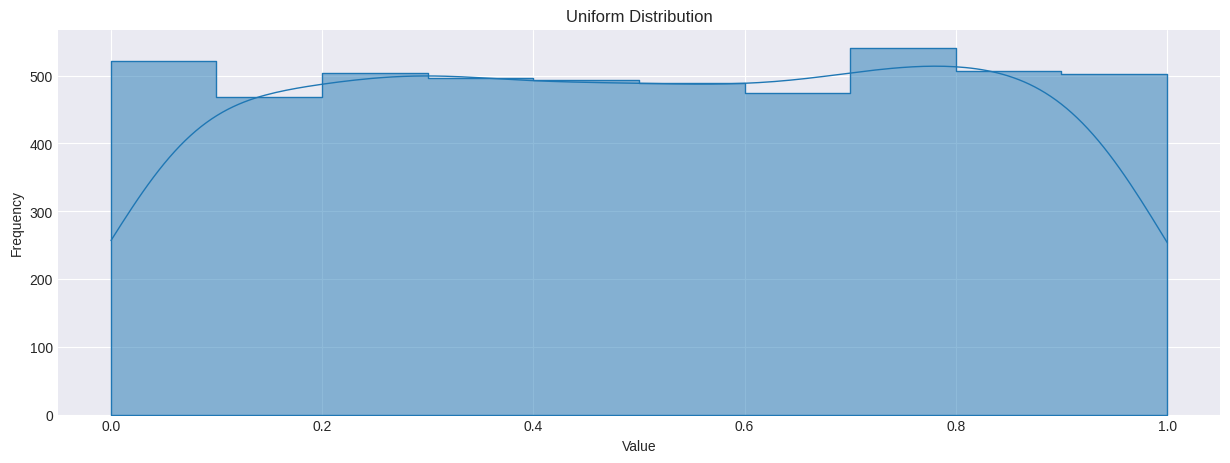

In [7]:
dist_type = 'uniform'
data_uniform = fn_gen_data(n_sample=N_SAMPLE,
             dist=dist_type,
             random_var=0)

fn_plot_data(data_uniform, title = dist_type)

### Normal Distribution
Draw random samples from a normal (Gaussian) distribution.

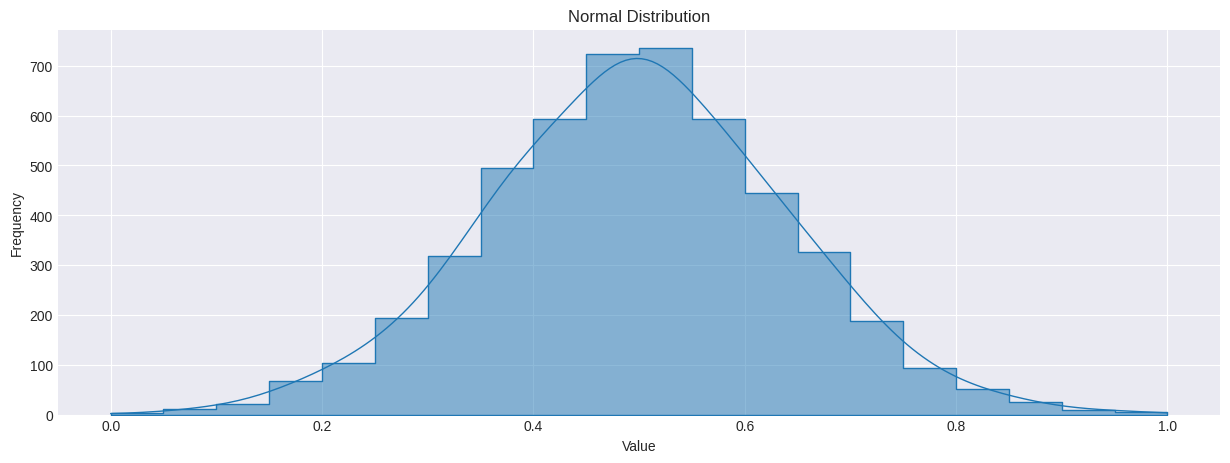

In [8]:
dist_type = 'normal'

data = fn_gen_data(n_sample=N_SAMPLE,
             dist=dist_type,
             random_var=0)

fn_plot_data(data, 0.05, title = dist_type)

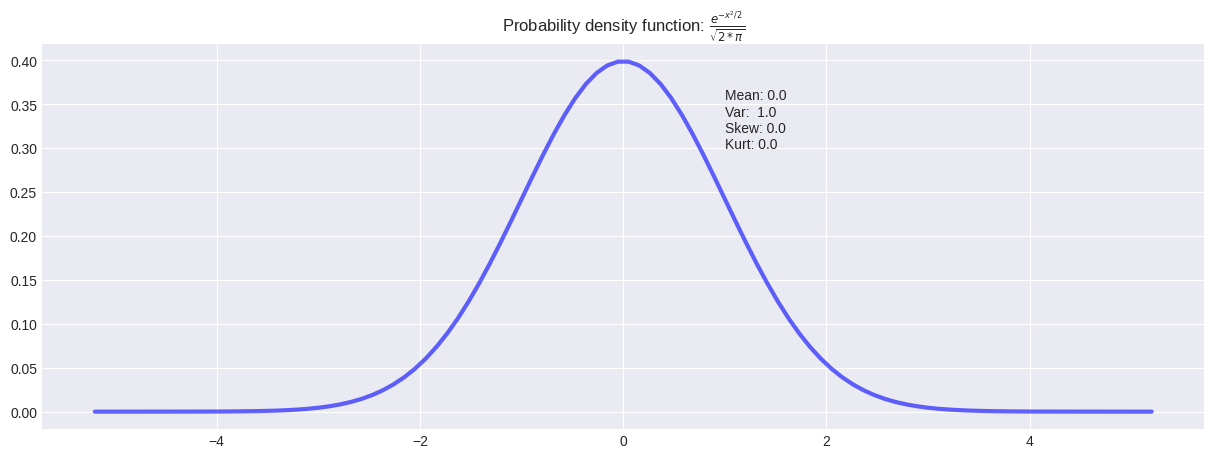

In [30]:
mean, var, skew, kurt = norm.stats(moments='mvsk')

eps = 1e-7 # a small value

x = np.linspace(norm.ppf(eps), # norm.ppf(0) is -inf
                norm.ppf(1-eps), # norm.ppf(1) is inf
                100)

plt.plot(x, norm.pdf(x),
       'b-', lw=3, alpha=0.6,
         label='norm pdf')
plt.title("Probability density function: $\\frac{e^{-x^2/2}} {\sqrt{2 * \pi}}$",
          fontsize=12)
plt.text(1,.3, 
         f'Mean: {mean}\nVar:  {var}\nSkew: {skew}\nKurt: {kurt}')
plt.grid(True)
plt.show()


- **Skewness** tells us about the direction and degree of asymmetry in a distribution.
- **Kurtosis** tells us about the concentration of data around the mean and in the tails.


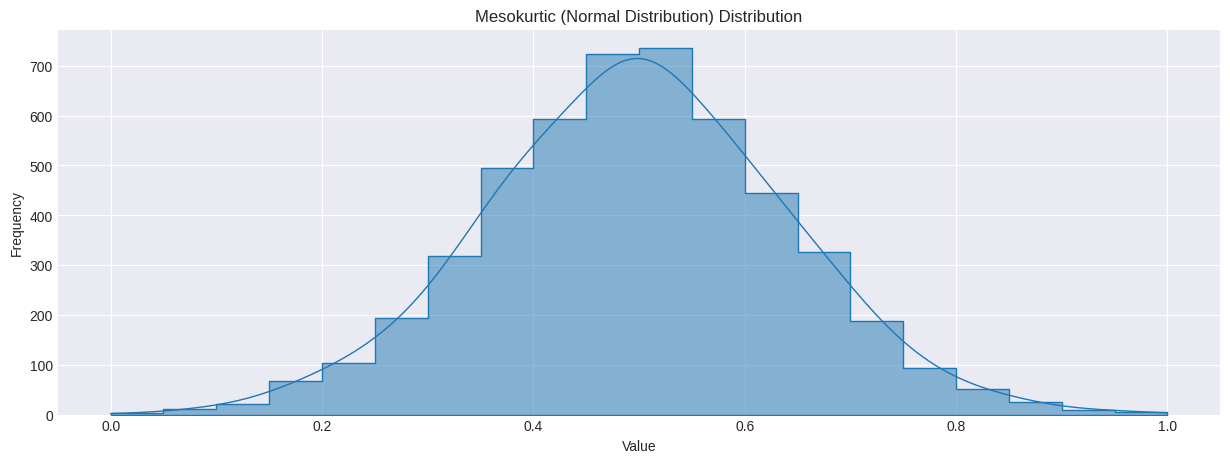

In [10]:
# 1. Mesokurtic Distribution (Normal Distribution)
fn_plot_data(data, 0.05, 
             title = "Mesokurtic (Normal Distribution)")

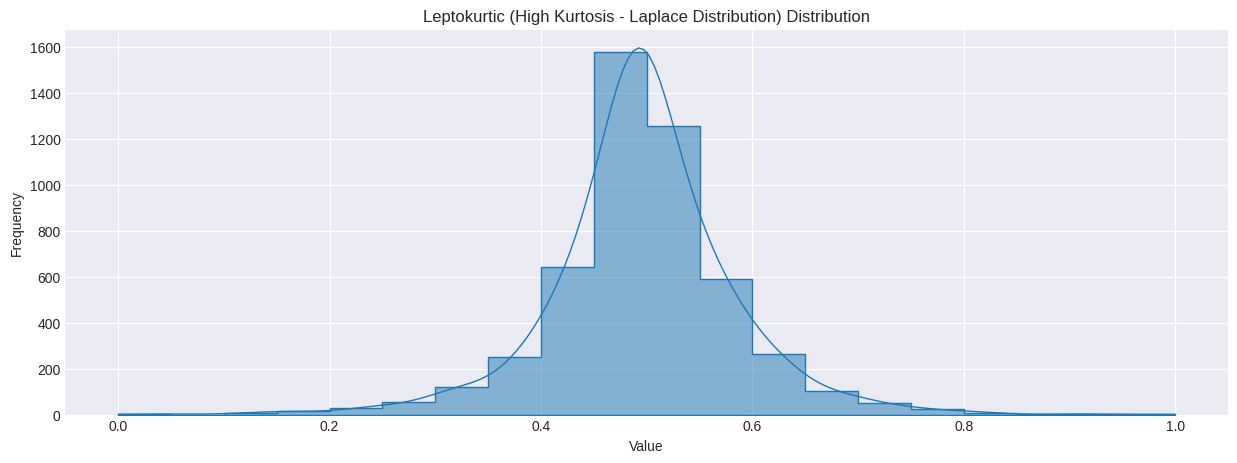

In [11]:
# 2. Leptokurtic Distribution (Higher kurtosis)
# Using a Laplace distribution which has fatter tails than normal
dist_type = 'laplace'

data_leptokurtic = fn_gen_data(n_sample=N_SAMPLE,
                               dist=dist_type,
                               random_var=0)

fn_plot_data(data_leptokurtic,0.05, 
             title= "Leptokurtic (High Kurtosis - Laplace Distribution)")


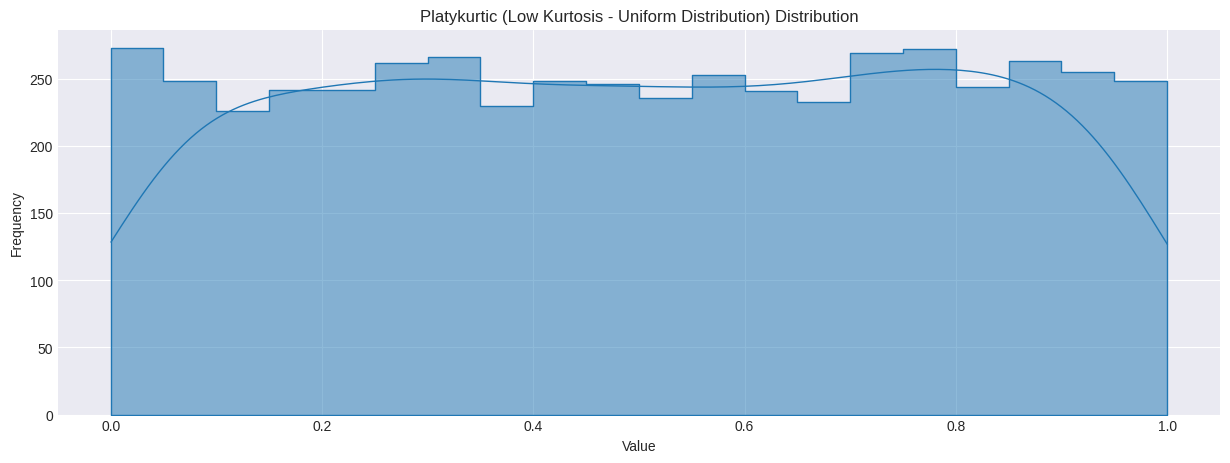

In [12]:


# 3. Platykurtic Distribution (Lower kurtosis)
# Using a uniform distribution which has thinner tails than normal

fn_plot_data(data_uniform, 
             0.05, 
             title= "Platykurtic (Low Kurtosis - Uniform Distribution)")


#### Explanation:
- Mesokurtic (Normal Distribution): We use a normal distribution with np.random.normal(), which has a kurtosis close to 0 (after subtracting 3 for excess kurtosis).

- Leptokurtic (High Kurtosis): A Laplace distribution (np.random.laplace()) has sharper peaks and fatter tails than a normal distribution, leading to higher kurtosis.

- Platykurtic (Low Kurtosis): A uniform distribution (np.random.uniform()) has a flat peak and thin tails, which results in lower kurtosis.

#### Shapiro-Wilk test
The **Shapiro-Wilk test** is a statistical test that checks whether a sample of data comes from a normally distributed population. It is one of the most powerful normality tests and is widely used because of its effectiveness, especially for small sample sizes (less than 50 samples), though it can be used for larger datasets as well.

#### Purpose of the Shapiro-Wilk Test
The goal of the Shapiro-Wilk test is to test the null hypothesis that a given set of data is drawn from a normal distribution. The test examines the closeness of your data to a normal distribution based on the relationships between the sample's quantiles and the expected quantiles of a normal distribution.

#### Hypotheses
- Null Hypothesis ($H_0$): The data is normally distributed.
- Alternative Hypothesis ($H_1$): The data is not normally distributed.
#### Test Statistic
The Shapiro-Wilk test produces a test statistic W. The value of W ranges from 0 to 1:

W = 1 means the sample perfectly fits a normal distribution.
As W decreases towards 0, it indicates the sample deviates from normality.
#### P-Value
Along with the test statistic W, the test also calculates a p-value, which is the probability that the data could have been drawn from a normal distribution:

If the p-value is less than a chosen significance level (commonly $|alpha$= 0.05), we reject the null hypothesis, concluding that the data is not normally distributed.

If the p-value is greater than the significance level, we fail to reject the null hypothesis, suggesting the data is normally distributed.

#### Interpreting Results
- If p-value > 0.05: There is no significant departure from normality (the sample is normally distributed, or we "fail to reject" the null hypothesis).
- If p-value ≤ 0.05: The sample significantly deviates from normality, and we reject the null hypothesis (the data is not normally distributed).

In [13]:
# Perform the Shapiro-Wilk Test
stat, p_value = shapiro(data)

print(f'Shapiro-Wilk Test Statistic: {stat}, P-value: {p_value}')

# Interpreting the result
alpha = 0.05
if p_value > alpha:
    print("The sample looks normally distributed (fail to reject H0)")
else:
    print("The sample does not look normally distributed (reject H0)")


Shapiro-Wilk Test Statistic: 0.9994387741497509, P-value: 0.1357158965915105
The sample looks normally distributed (fail to reject H0)


## Bernoulii distribution

The Bernoulli distribution, named after Swiss mathematician Jacob Bernoulli, is the probability distribution of a random variable which takes the value 1 with probability $p$ and the value 0 with probability $q = 1 − p$ — i.e., the probability distribution of any single experiment that asks a ___yes–no question___; the question results in a boolean-valued outcome, a single bit of information whose value is success/yes/true/one with probability $p$ and failure/no/false/zero with probability $q$. 

It can be used to represent a coin toss where 1 and 0 would represent "head" and "tail" (or vice versa), respectively. In particular, unfair coins would have $p ≠ 0.5$.

The probability mass function $f$ of this distribution, over possible outcomes $k$, is

$${\displaystyle f(k;p)={\begin{cases}p&{\text{if }}k=1,\\[6pt]1-p&{\text{if }}k=0.\end{cases}}}$$

In [14]:
# Fair Coin
# p=0.5 i.e. fair coin
bernoulli.rvs(p=0.5,size=10)

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [15]:
pr=0.5 # Fair coin toss probability
mean, var, skew, kurt = bernoulli.stats(p=pr, moments='mvsk')

print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

Mean: 0.5
Variance: 0.25
Skew: 0.0
Kurtosis: -2.0


In [16]:
pr=0.7 # Biased coin toss probability
mean, var, skew, kurt = bernoulli.stats(p=pr, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

Mean: 0.7
Variance: 0.21000000000000002
Skew: -0.8728715609439702
Kurtosis: -1.2380952380952361


In [17]:
pr=0.9 # Biased coin toss probability
mean, var, skew, kurt = bernoulli.stats(p=pr, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

Mean: 0.9
Variance: 0.08999999999999997
Skew: -2.6666666666666705
Kurtosis: 5.111111111111155


......

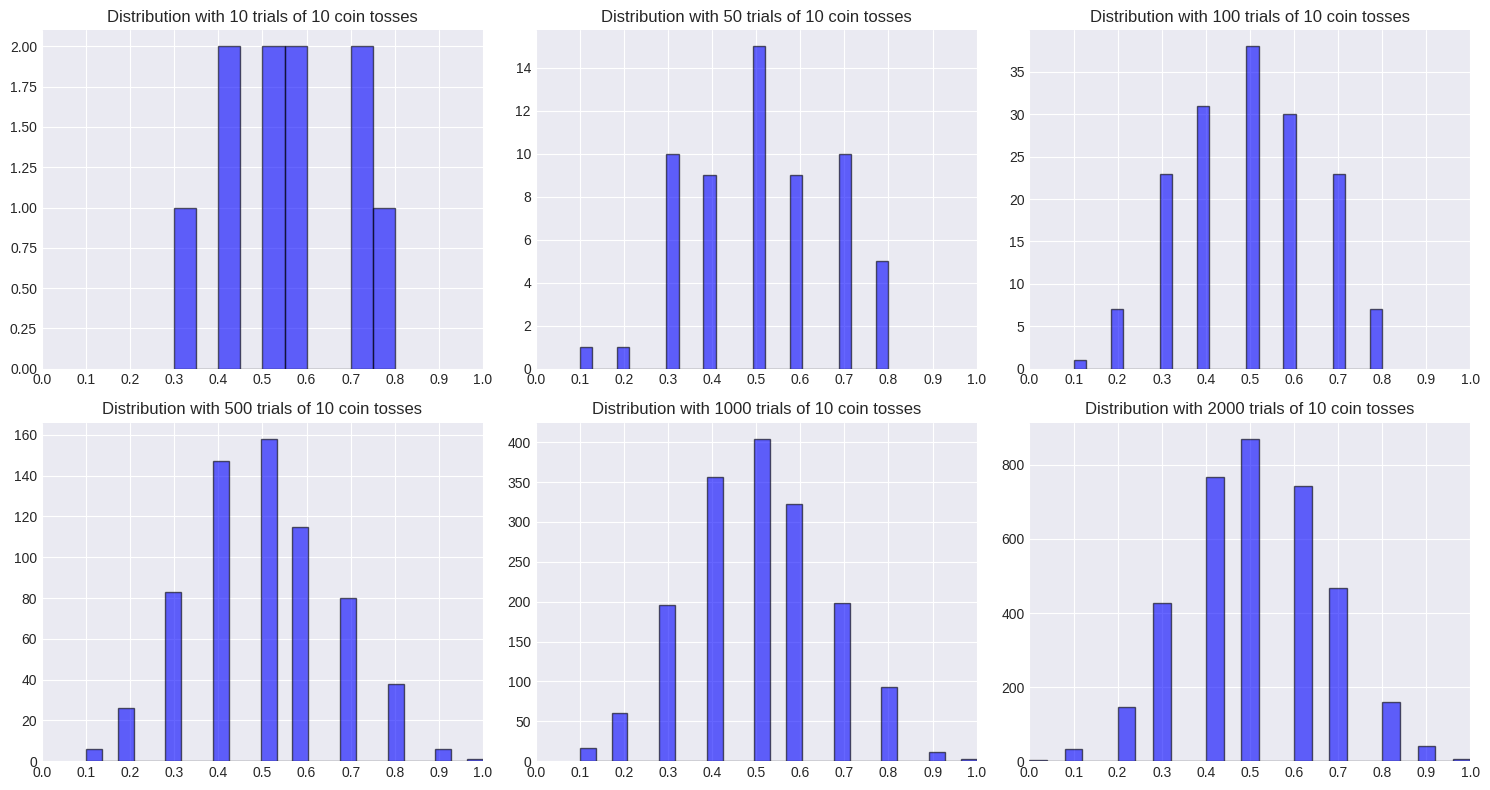

In [18]:
num_trials = [10, 50, 100, 500, 1000, 2000] # Number of trials
pr=0.5 # Fair coin toss probability
av = [] # Empty list to store the average of the random variates

fig, axes = plt.subplots(2,3, figsize = (15,8))
axes = axes.ravel()


for count, nTrials in enumerate(num_trials):
    print ('.', end='')
    ax = axes[count]
    bins = 25
    if nTrials == 10:
        bins = 10
        
    for n in range(1,nTrials+1):
        # Generate 10 variates every time and take the average. 
        # That should be # of 1's i.e. 0.5 for a fair coin.
        av.append(np.mean(bernoulli.rvs(p=pr,size=10))) 
    
    ax.set_title("Distribution with {} trials of 10 coin tosses".format(nTrials))
    ax.hist(av,bins=bins,edgecolor='k',color='b', alpha=0.6)
    ax.set_xlim(0.0,1.0)
    ax.set_xticks([0.1*i for i in range(11)])
    ax.grid(True)
plt.tight_layout()
plt.show()

### Binomial Distribution

The Binomial Distribution is a probability distribution that summarizes the likelihood that a value will take one of two independent values under a given number of observations or trials, with a constant probability of occurrence for each trial.

The Binomial distribution generalizes the Bernoulli distribution to multiple independent trials of the same experiment. It represents the number of successes in a fixed number of independent Bernoulli trials, each with the same probability of success. It is used when you conduct an experiment multiple times and want to know the probability of a certain number of successes.

#### Case : Factory
Imagine a factory produces light bulbs, and each light bulb has a 5% chance of being defective. A quality control manager decides to randomly select 10 light bulbs from the production line to check if they are defective. The situation can be modeled using a binomial distribution.

- n (number of trials): 10 (since 10 light bulbs are being tested)
- p (probability of success): 0.05 (probability that a light bulb is defective)
- 1-p (probability of failure): 0.95 (probability that a light bulb is not defective)
Here, "success" is defined as finding a defective light bulb, and "failure" is finding a non-defective bulb.

The binomial distribution can answer questions like:

- What is the probability that exactly 2 out of the 10 light bulbs are defective?
- What is the probability that at least 1 light bulb is defective in the sample of 10?

#### Case 2: User Preference
Imagine we are trying to ascertain if people prefer Magic Masala or Plain Salted:


<img src = ../../images/acp_s17_fig2.png height = 400/>

<img src = ../../images/acp_s17_fig1.png height = 400/>

#### Interpretation:
- The calculated probability gives the likelihood of observing a specific number of successes (in this case, 2 magic masala) in a given number of trials.
- Binomial probability is often used in scenarios like quality control (e.g., finding the probability that a certain number of products out of a batch are defective), survey analysis, and other discrete outcome experiments.


In [19]:
# Parameters
n = 3   # number of items (Wafers picked)
p = 0.5 # probability of success (choosing)
k = 1    # number of successes (One lays)

# Calculate the probability using binomial distribution
probability = binom.pmf(k, n, p)

print(f"The probability of finding exactly {k} defective bulbs out of {n} is: {probability:.4f}")

The probability of finding exactly 1 defective bulbs out of 3 is: 0.3750


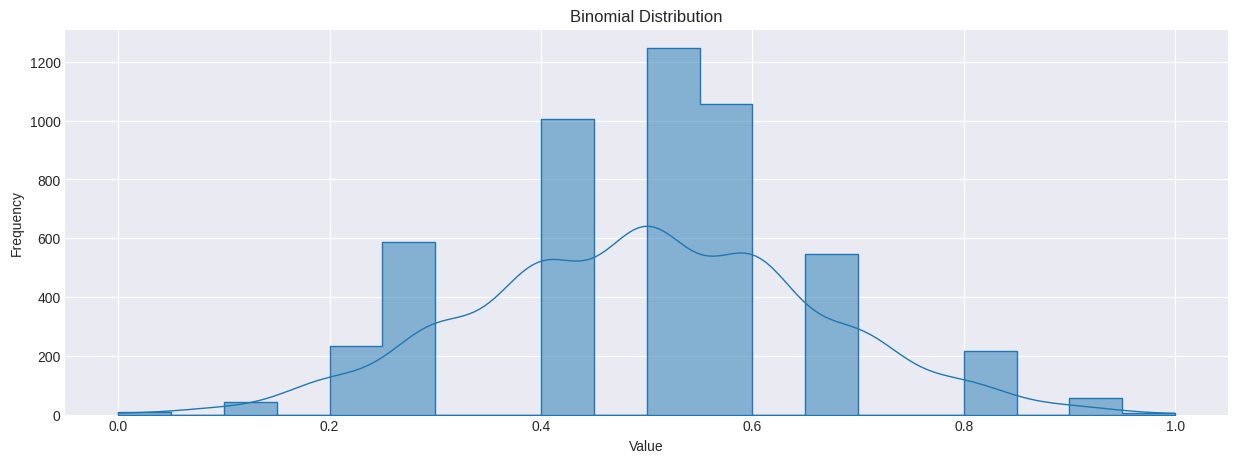

In [20]:
dist_type = 'binomial'

data = fn_gen_data(n_sample=N_SAMPLE,
             dist=dist_type,
             random_var=0)

fn_plot_data(data, 0.05, title = dist_type)

### Exponential Distribution

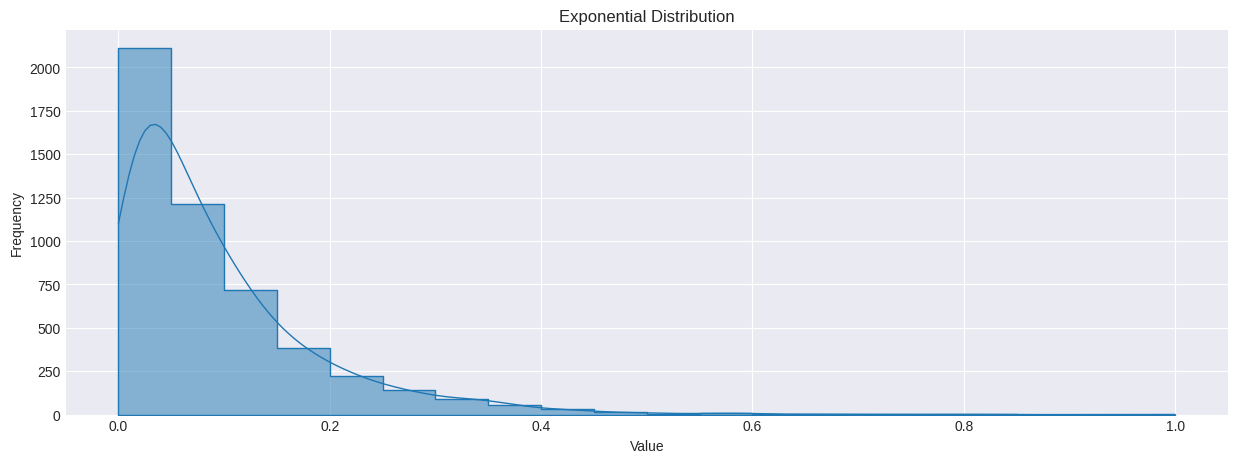

In [21]:
dist_type = 'exponential'

data = fn_gen_data(n_sample=N_SAMPLE,
                   dist=dist_type,
                   random_var=0)

fn_plot_data(data, 0.05, title = dist_type)

### Poisson Distribution

Imagine you run a small bakery, and on average, 3 customers arrive per hour. You want to know the probability that exactly 5 customers will arrive in the next hour.

The probability of observing k events (in this case, customers) in a fixed interval (time, area, etc.) is given by:

$P(X=k) = \frac{\lambda^k . e^{-\lambda}}{k!}$ 
​
 
So in our example:
$\lambda$ = 3; k = 5


$
\begin{aligned}
P(5) & = \frac{3^5 * e^{-3}}{5!}\\
& = \frac{243 * 0.0498 } { 120 }
\approx 0.1008
\end{aligned}
$ 

In [22]:
# Parameters
lambda_value = 3  # average rate (customers per hour)
k = 5  # number of customers

# Calculate the probability
probability = poisson.pmf(k, lambda_value)
probability

0.10081881344492458

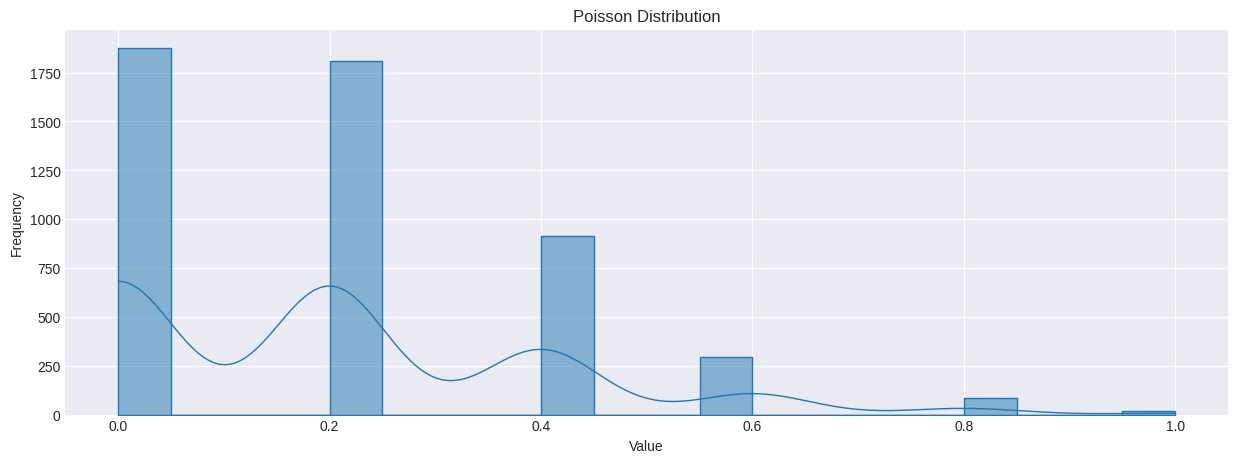

In [23]:
dist_type = 'poisson'
data = fn_gen_data(n_sample=N_SAMPLE,
                   dist=dist_type,
                   random_var=0)

fn_plot_data(data, 0.05, title = dist_type)

### Joint, Conditional, and Marginal Probability
- Joint Probability: Probability of two events happening together.
- Conditional Probability: Probability of an event given that another event has occurred.
- Marginal Probability: Probability of an event occurring irrespective of the outcomes of other variables.


#### Joint Probability
Joint probability refers to the probability of two events occurring simultaneously. If you have two events, A and B, the joint probability $𝑃(A \cap B)$ represents the probability that both events happen together.

##### Example:
Consider rolling two fair dice. What is the probability that the first die shows a 3 and the second die shows a 5?

Since the dice rolls are independent, the joint probability is the product of the individual probabilities:
$𝑃(A \cap B)$ = P(First die shows 3) * P(Second die shows 5)
Since each die has 6 faces:

$𝑃(A \cap B) = \frac{1}{6} * \frac{1}{6} = \frac{1}{36}$

*Note*: it is not same as total of both dice being 8.



#### Marginal Probability
Marginal probability is the probability of a single event occurring, irrespective of the outcome of another event. It’s derived by summing or integrating the joint probabilities over the possible values of the other event.

##### Example:
What is the probability of rolling a 3 on the first die, regardless of the outcome of the second die?

In this case, you sum the joint probabilities over all possible outcomes of the second die:

$
\begin{aligned}
𝑃(𝐴) & = \sum_{j=1}^{6} P\text{ (First die shows 3 and Second die shows j)}\\ 
& = \sum_{j=1}^{6} \frac{1}{36}\\
& =\frac{6}{36} = \frac{1}{6}
\end{aligned}
$

In [24]:
# Example data: Probability of passing based on study hours
data = {
    'Study Hours': ['Low', 'Low', 'High', 'High'],
    'Pass Exam': [0, 1, 0, 1],
    'Frequency': [3, 7, 2, 8]
}
df = pd.DataFrame(data)

# Joint Probability: P(High Study Hours and Pass Exam)
joint_prob = df[(df['Study Hours'] == 'High') & (df['Pass Exam'] == 1)]['Frequency'].sum() / df['Frequency'].sum()
print(f"Joint Probability of High Study Hours and Passing: {joint_prob:.2f}")

# Conditional Probability: P(Pass Exam | High Study Hours)
conditional_prob = joint_prob / (df[df['Study Hours'] == 'High']['Frequency'].sum() / df['Frequency'].sum())
print(f"Conditional Probability of Passing given High Study Hours: {conditional_prob:.2f}")

Joint Probability of High Study Hours and Passing: 0.40
Conditional Probability of Passing given High Study Hours: 0.80


### Central Limit Theorem (CLT): 
The distribution of the sum of a large number of independent, identically distributed variables tends toward a normal distribution.
<hr>

## Bayesian Statistics

Bayes' Theorem, also known as Bayes' Rule, allows us to 'invert' conditional probabilities. As a reminder, conditional probabilities represent the probability of an event given some other event has occurred, which is represented with the following formula: 

$P(A\mid B) = \frac{P(B \mid A)P(A)}{P(B)}$

where $A$ and $B$ are events and $P(B)\neq0$.

- $P(A\mid B)$ is a conditional probability: the likelihood of event $A$ occurring given that $B$ is true.
- $P(B\mid A)$ is also a conditional probability: the likelihood of event $B$ occurring given that $A$ is true.
- $P(A)$ and $P(B)$ are the probabilities of observing $A$ and $B$ independently of each other; this is known as the marginal probability.

The Naive Bayes classifier is a supervised machine learning algorithm, which is commonly applied in use cases involving recommendation systems, text classification, and sentiment analysis. Since it performs well with data sets with high dimensionality, it is a favored classifier for text classification in particular.

Naive Bayes (NB) is also a generative learning algorithm, which means that it models the distribution of data points for a given class or category. This probabilistic classifier is based off of Bayes' Theorem, meaning that this Bayesian classifier uses conditional probabilities and prior probabilities to calculate the posterior probabilities.

Naive Bayes classifiers work differently in that they operate under a couple of key assumptions, earning it the title of naive. It assumes that predictors in a Naive Bayes model are conditionally independent, or unrelated to any of the other feature in the model. It also assumes that all features contribute equally to the outcome.

While these assumptions are often violated in real-world scenarios (for example, a subsequent word in an e-mail is dependent upon the word that precedes it), it simplifies a classification problem by making it more computationally tractable. That is, only a single probability will now be required for each variable, which, in turn, makes the model computation easier. Despite this unrealistic independence assumption, the classification algorithm performs well, particularly with small sample sizes.

In this tutorial, we’ll use scikit-learn to walk through different types of Naive Bayes algorithms, focusing primarily on a popular text classification task (spam filtering) using Multinomial Naive Bayes.

## DataSet
<img src = '../../images/iris.png' width='400 px'>
<br>
<img src = '../../images/iris_petal_sepal.png' width='200 px',>

In [25]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

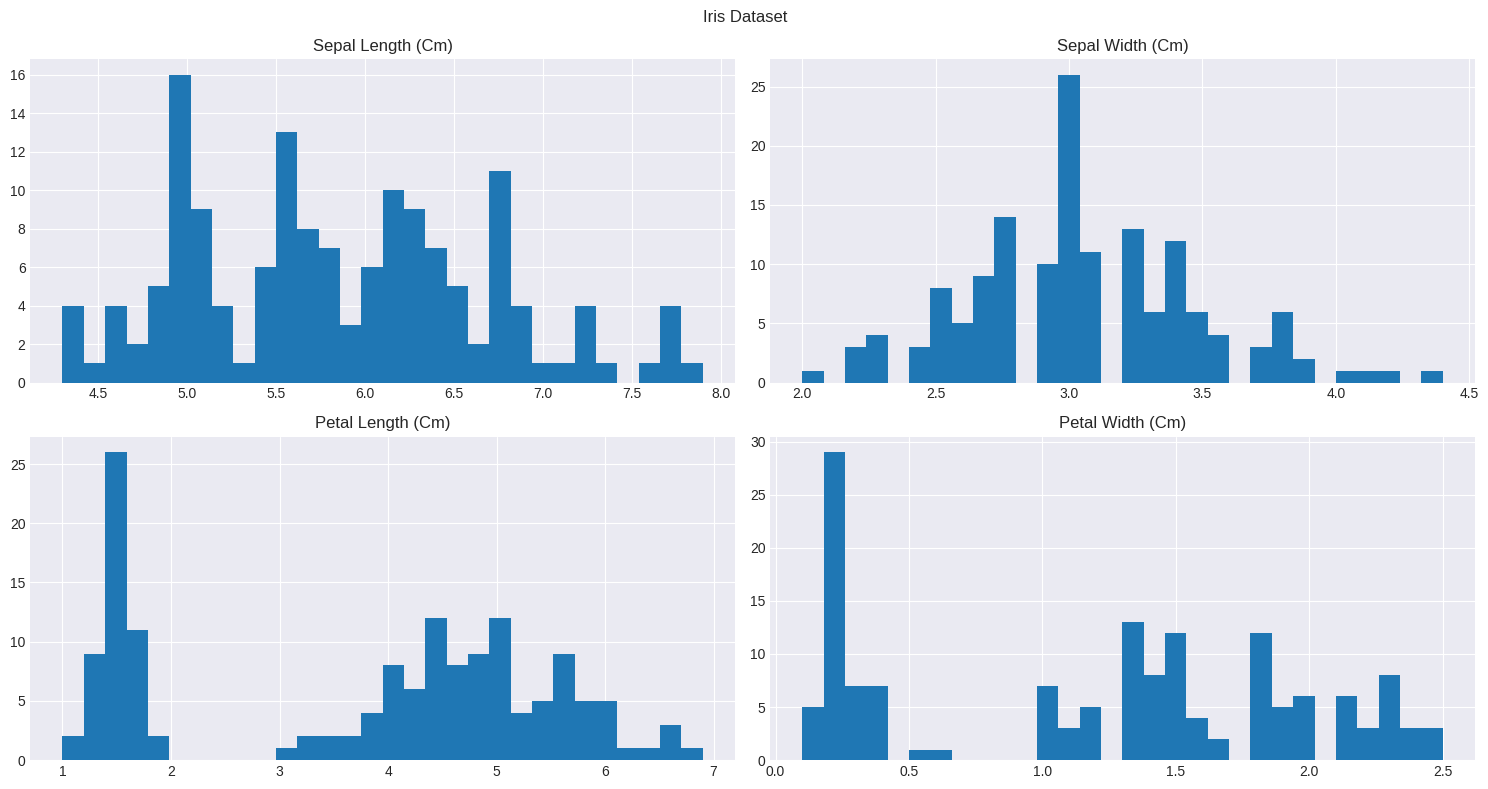

In [26]:
# Plot the features
fig = plt.figure( figsize = (15 , 8) )

fig.suptitle('Iris Dataset')

for col in np.arange(X.shape[1]):
    
        # Add the first set of axes (subplot 1)
        ax = fig.add_subplot(2, 2, col+1)  # 2 row, 2 columns
                
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
        
        n, bins, patches = ax.hist( X[: , col], 30)
        
        ax.set_title('{}'.format(feature_names[col].title()))
        
        ax.axis('tight')

        ax.grid(True)

        #plt.legend(loc = 'best')

plt.tight_layout()

plt.show()

In [27]:
## Function to calculate Mean, Standard Deviation

def fn_calc_mu_std(df):

    '''
    Args:
        df: dataframe
    '''

    mu= {} # dictionary to hold mean
    
    std_dev = {} # dictionary to hold sigma
    
    min_val = {} # min value of the col
    
    max_val = {}
    
    for col in df.columns:
        
        mu[col] = df[col].mean()
        
        std_dev[col] = df[col].std()
        
        min_val[col] = df[col].min()
        
        max_val[col] = df[col].max()

    return mu, std_dev, min_val, max_val

In [28]:
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = y
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


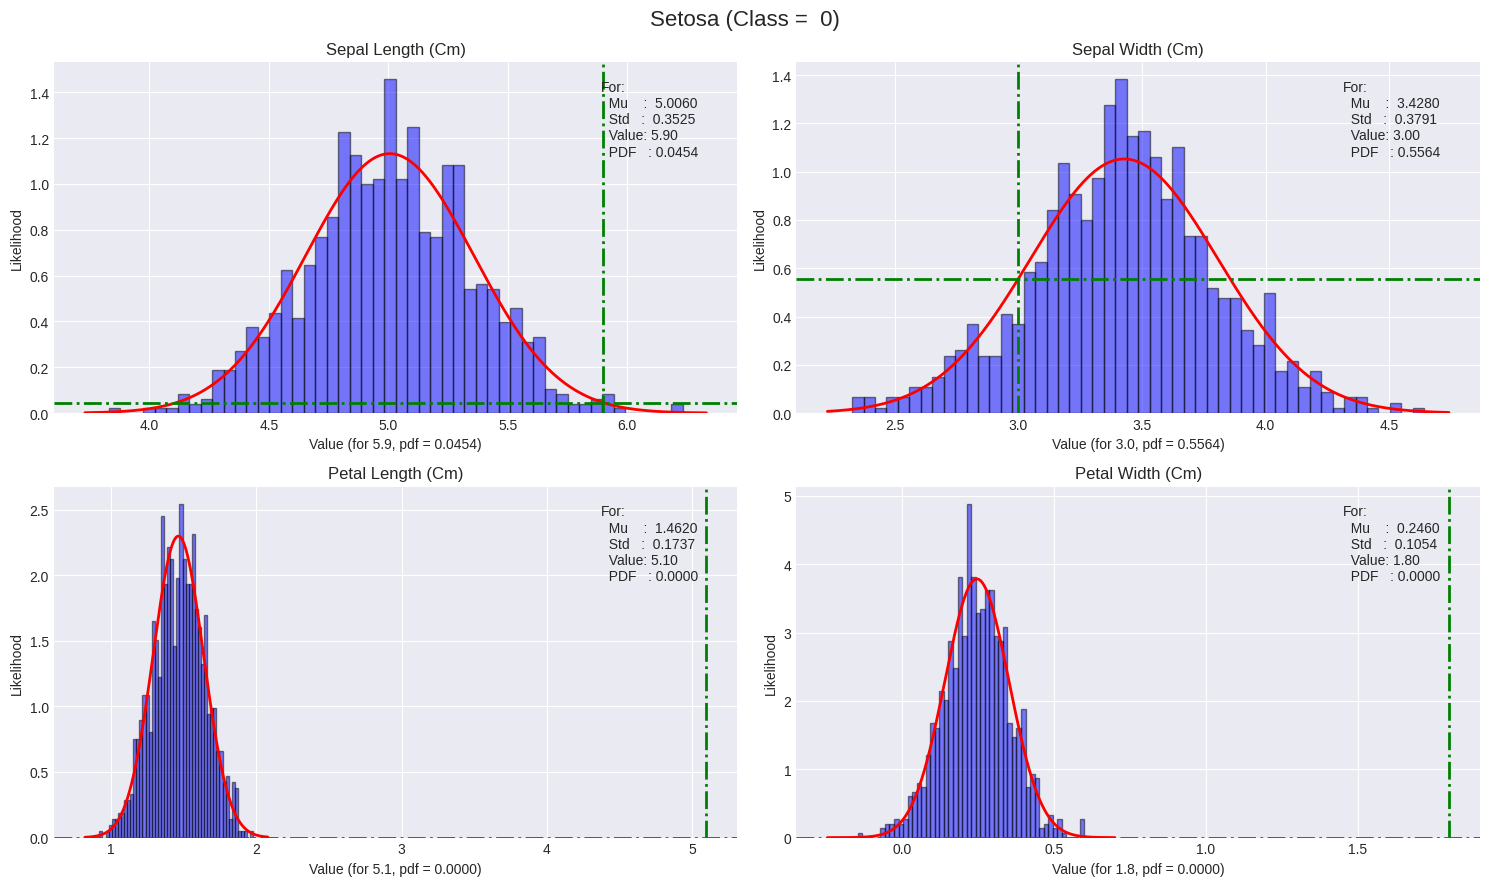

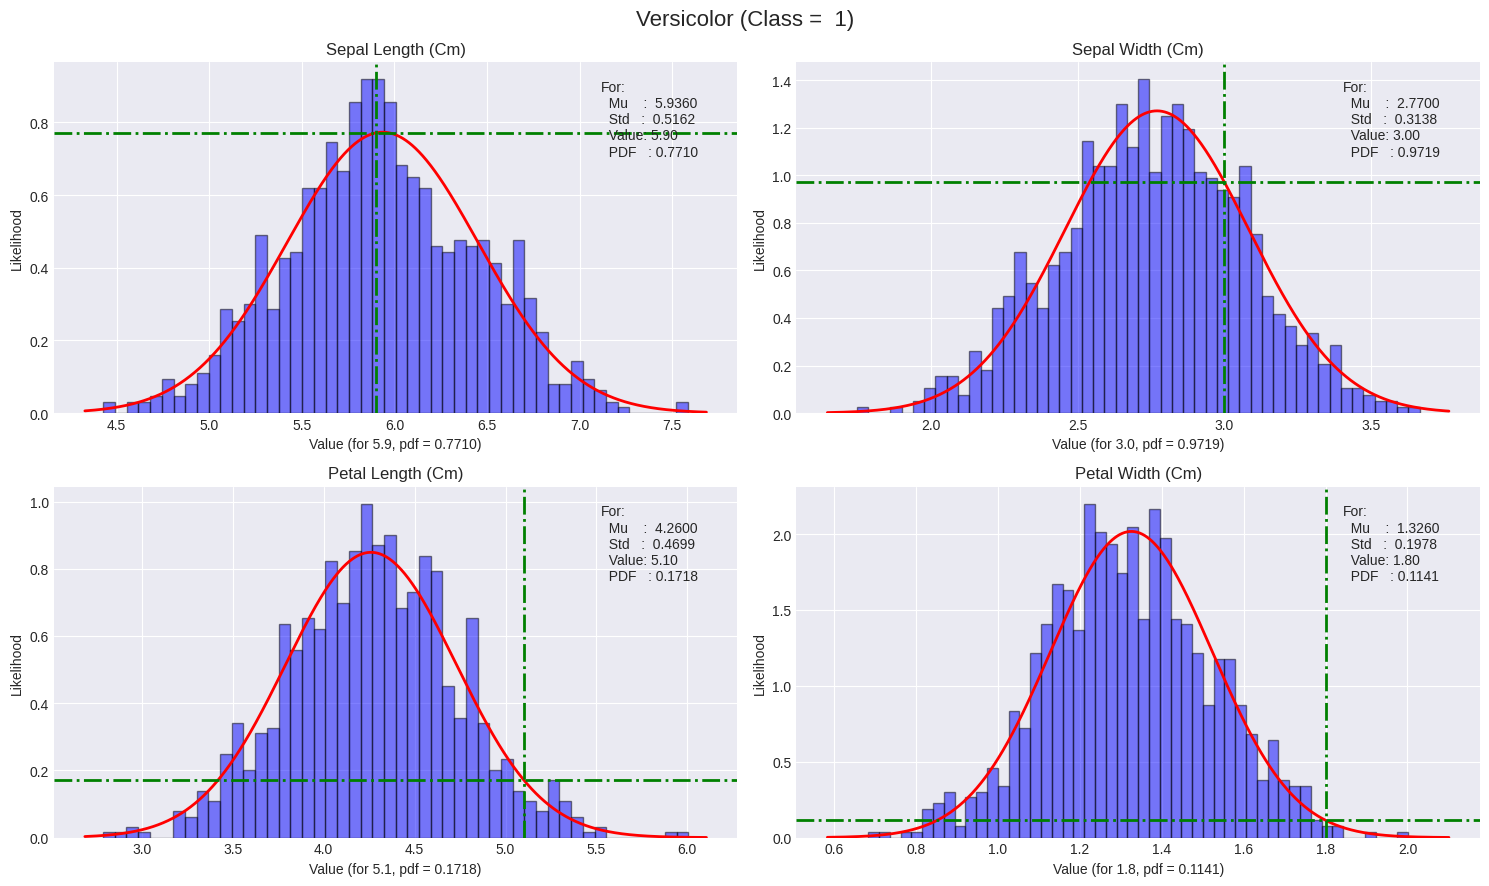

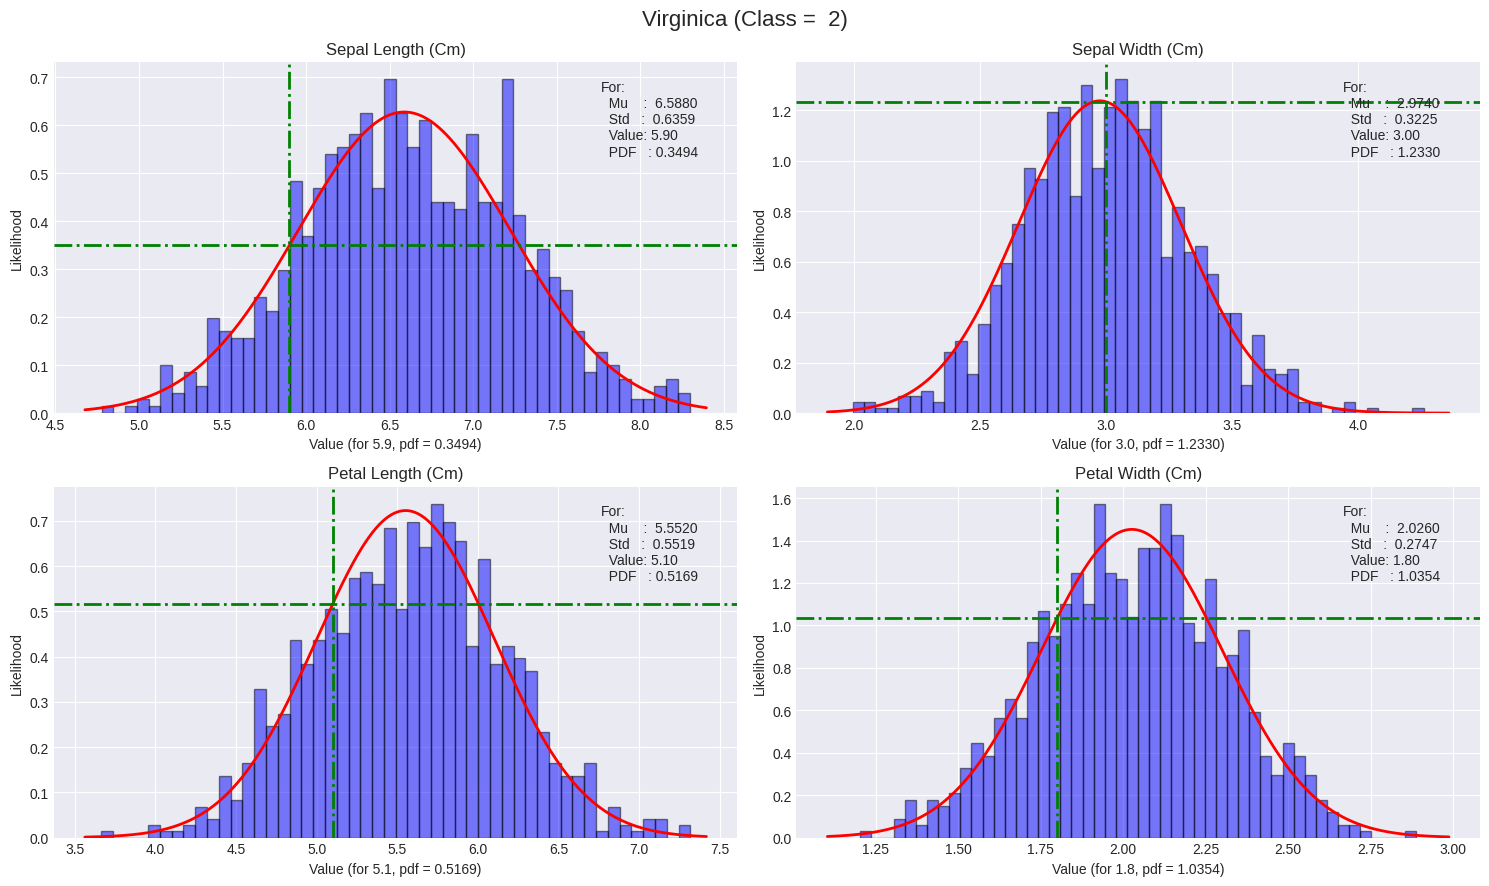

In [29]:
pdf_label = {}

for lbl in iris_df['target'].unique():

    label = target_names[lbl]
    
    tmp_df = iris_df[iris_df['target'] == lbl] # dataframe with one class

    tmp_df = tmp_df.drop('target', axis = 1)
    
    mu, std_dev, min_val, max_val = fn_calc_mu_std(tmp_df) # call fn using this tmp df

    fig, axes = plt.subplots(2,2, figsize = (15 , 9) )
    
    fig.suptitle(f'{label.title()} (Class = {lbl:2d})', fontsize =16)
    
    nSample = 1000

    pdf_col = {}
    
    for count, col in enumerate(tmp_df.columns):
    
        ax = axes.ravel()[count]
        
        meanVal = mu[col]
        stdDev = std_dev[col]
        minVal = min_val[col]
        maxVal = max_val[col]
        data = np.random.normal(meanVal, stdDev, nSample)
        
        ax.hist(data, bins=50, density=True, alpha=0.5, color='b', edgecolor='k')
        x = np.linspace(data.min()- 0.1, data.max() + 0.1, nSample)
        pdf = norm.pdf(x, meanVal, stdDev)
        ax.plot(x, pdf, 'r-', lw=2)
    
        val = iris_df.iloc[-1][col]
        pdf_val = norm.pdf(val, meanVal, stdDev) # given the value what is the probability
        pdf_col[col] = pdf_val
        
        ax.axvline(x=val, color='g', linestyle='-.', linewidth=2)
        ax.axhline(y=pdf_val, color='g', linestyle='-.', linewidth=2)
        
        # little beautification
        fmtStr =  "For:\n  Mu    : {:7.4f}\n  Std   : {:7.4f}\n  Value:{:5.2f}\n  PDF   :{:7.4f}"
        txtstr =fmtStr.format(meanVal, stdDev, val, pdf_val) #text to plot
        # place a text box in upper left in axes coords
        
        ax.text(0.8, 0.95, txtstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top')

        
        ax.set_title(col.title())
        ax.set_xlabel(f"Value (for {val}, pdf = {pdf_val:.4f})")
        ax.set_ylabel("Likelihood")
        ax.grid(True)
        
    pdf_label[ label] = pdf_col
    plt.tight_layout()
    plt.show()


### Some Essential Terminologies

* __Mode__: for a discrete random variable, the value with highest probability (the location at which the probability mass function has its peak); for a continuous random variable, a location at which the probability density function has a local peak.
* __Support__: the smallest closed set whose complement has probability zero.
* __Head__: the range of values where the pmf or pdf is relatively high.
* __Tail__: the complement of the head within the support; the large set of values where the pmf or pdf is relatively low.
* __Expected value or mean__: the weighted average of the possible values, using their probabilities as their weights; or the continuous analog thereof.
* __Median__: the value such that the set of values less than the median, and the set greater than the median, each have probabilities no greater than one-half.
* __Variance__: the second moment of the pmf or pdf about the mean; an important measure of the dispersion of the distribution.
* __Standard deviation__: the square root of the variance, and hence another measure of dispersion.
* __Symmetry__: a property of some distributions in which the portion of the distribution to the left of a specific value is a mirror image of the portion to its right.
* __Skewness__: a measure of the extent to which a pmf or pdf "leans" to one side of its mean. The third standardized moment of the distribution.
* __Kurtosis__: a measure of the "fatness" of the tails of a pmf or pdf. The fourth standardized moment of the distribution.

<hr>

## Central Tendency and Spread

Lets discuss fundamentals concepts of descriptive statistics such as central tendency and dispersion (spread) measures - mean/median/mode and variance. 

We show how to compute such descriptive statistics using basic Python code (without using any library) as well as using `NumPy` functions.

### Central tendency
A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. They are also categorized as summary statistics:

* **Mean**: Mean is the sum of all values divided by the total number of values.

$$ \mu = \frac{\sum{n_i}}{N} \\ \text{where } N = \sum{i} \text{ : total number of observations}$$

* **Median**: The median is the middle value. It is the value that splits the dataset in half. To find the median, order your data from smallest to largest, and then find the data point that has an equal amount of values above it and below it.
* **Mode**: The mode is the value that occurs the most frequently in your dataset. On a bar chart, the mode is the highest bar.

Generally, the mean is a better measure to use for symmetric data and median is a better measure for data with a skewed (left or right heavy) distribution. For categorical data, you have to use the mode.

### Spread
The spread of the data is a measure of by how much the values in the dataset are likely to differ from the mean of the values. If all the values are close together then the spread is low; on the other hand, if some or all of the values differ by a large
amount from the mean (and each other), then there is a large spread in the data.

* **Variance**: This is the most common measure of spread. Variance is the average of the squares of the deviations from the mean. Squaring the deviations ensures that negative and positive deviations do not cancel each other out.

$$V = \frac{\sum{(n_i-\mu)^2}}{N}$$

* **Standard Deviation**: Because variance is produced by squaring the distance from the mean, its unit does not match that of the original data. Standard deviation is a mathematical trick to bring back the parity. It is the positive square root of the variance.

$$\sigma = \sqrt{\frac{\sum{(n_i-\mu)^2}}{N}}$$

> **NOTE**: When we later build regression models, we will revisit these definitions in the conext of statistical estimation. There, the sample variance will be given by a slightly different formula (the denominator will change),

$$V = \frac{\sum{(n_i-\mu)^2}}{N-2}$$